In [7]:
import matplotlib.pyplot as plt
import json
import os
import PIL

In [3]:
yolo_box_json = json.load(open("/home/chen/workshop/thesis/human-pose-estimation.pytorch/data/crowdpose/person_detection_result/test_box.json"))
gt_json = json.load(open("/home/chen/workshop/thesis/human-pose-estimation.pytorch/data/crowdpose/annotations/crowdpose_test.json"))

In [44]:
image_id = yolo_box_json[4]["image_id"]

In [57]:
gt_dict = []
for item in gt_json['annotations']:
    if item['image_id'] == image_id:
        gt_dict.append(item['bbox'])
        print(list(item['bbox']), 1)

[316.76, 157.3, 100.54, 247.56] 1
[279.68, 102.17, 81.13, 255.49] 1


In [61]:
yolo_dict = []
for item in yolo_box_json:
    if item['image_id'] == image_id:
        yolo_dict.append(list(item['bbox']))
        print([float("%.1f"%i) for i in item['bbox']], item['score'])

[323.0, 149.8, 411.9, 415.6] 0.9928643703460693
[278.8, 99.8, 362.8, 358.8] 0.9588466286659241
[0.7, 262.7, 27.7, 334.4] 0.1918240189552307


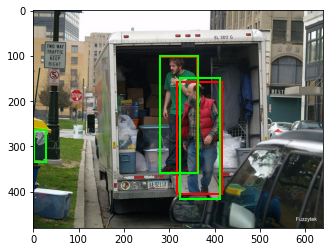

In [63]:
IMG_ROOT_DIR = "/home/chen/workshop/thesis/human-pose-estimation.pytorch/data/crowdpose/images"
for idx, cat_dict in enumerate([gt_dict, yolo_dict]):
    img_path = os.path.join(IMG_ROOT_DIR, str(image_id) + '.jpg')
    for i in range(len(cat_dict)):
        if idx == 0:
            plt.gca().add_patch(plt.Rectangle(xy=(cat_dict[i][0], cat_dict[i][1]),
                                            width=cat_dict[i][2], 
                                            height=cat_dict[i][3],
                                            edgecolor=[c / 255 
                                                for c in [(255, 0, 0), (0,255,0)][idx]],
                                            fill=False, linewidth=2))
        else:
            plt.gca().add_patch(plt.Rectangle(xy=(cat_dict[i][0], cat_dict[i][1]),
                                            width=cat_dict[i][2]-cat_dict[i][0], 
                                            height=cat_dict[i][3]-cat_dict[i][1],
                                            edgecolor=[c / 255 
                                                for c in [(255, 0, 0), (0,255,0)][idx]],
                                            fill=False, linewidth=2))

plt.imshow(PIL.Image.open(img_path))

matplotlib.patches.Rectangle